#### About Plotly
##### Plotly is a Data Viz library by the company Plotly based out of Canada with support in languages such as Python, Js, Julia etc.

###### .Advantages
###### .Multi language support
###### .Lot's of graphs
###### .Interactive plots
###### .Beautiful plots
###### .Does not work with live data streams. Dash can be explored for that.

#### The Plotly Roadmap
###### .Plotly Go(Graph Objects) -->> Mother of all things in Plotly
###### .Plotly Express
###### .Dash-->>By using this you can make proper website (that can we shown on internet online) by using these above two graphs.
###### Summary you can consider or compare Plotly Go with Matplotlib , Plotly Express with Seaborn and Dash with Streamlit

#### Working with Plotly Go

In [62]:
# importing libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px


In [63]:
# import datasets -->> already available in plotly express
tips = px.data.tips()
iris = px.data.iris()
gap = px.data.gapminder()

In [64]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [65]:
# scatter plots using plotly go
temp_df = gap[gap['year'] == 2007]

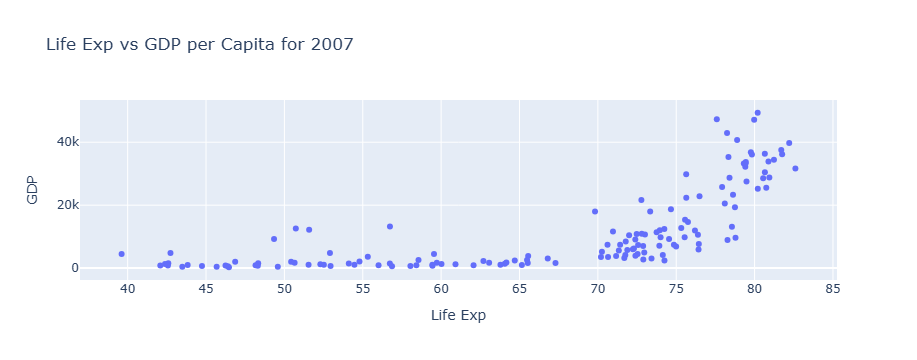

In [66]:
trace1 = go.Scatter(x = temp_df['lifeExp'], y = temp_df['gdpPercap'],mode = 'markers')
# mode = 'markers' must be passed to get Scatter graph nhi to it gives line plot coz scatter ka use krke hi dono graph bnte h

#data k list me hm utne trace pass krte hai jitta hme graph banana hota h let say if 2 graph ek sath then data=[trace1,trace2]
data = [trace1]
layout = go.Layout(title = 'Life Exp vs GDP per Capita for 2007', xaxis = {'title':'Life Exp'},yaxis = {'title':'GDP'})
fig = go.Figure(data,layout)

fig.show()

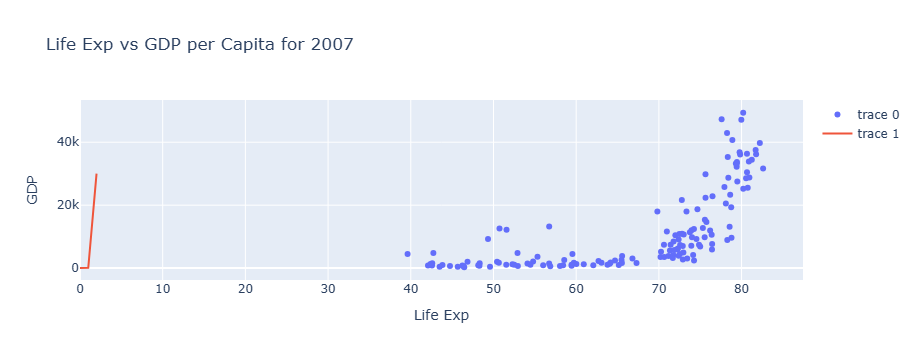

In [67]:
# Creating two traces
trace1 = go.Scatter(x = temp_df['lifeExp'], y = temp_df['gdpPercap'],mode = 'markers')
trace2 = go.Scatter(x = [0,1,2],y = [0,90,30000],mode = 'lines')

data = [trace1,trace2]
layout = go.Layout(title = 'Life Exp vs GDP per Capita for 2007', xaxis = {'title':'Life Exp'},yaxis = {'title':'GDP'})
fig = go.Figure(data,layout)

fig.show()

##### Now we plot same graph as above using Plotly express

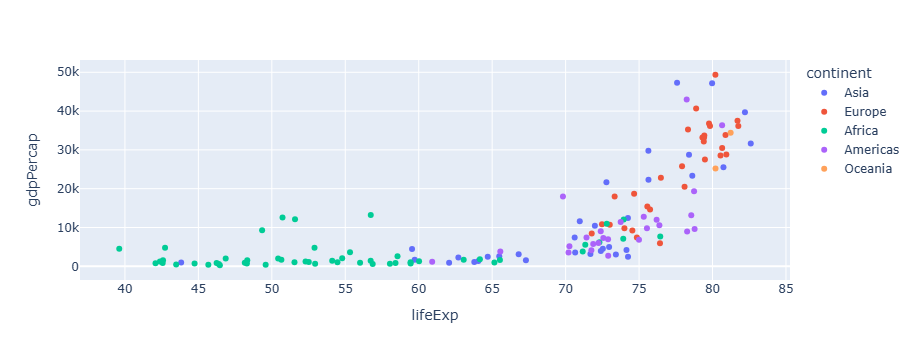

In [68]:
# plot life exp and gdp scatter plot -->> continent as color -->> pop as size -->> hover name -->> range_x/range_y-->>
# log_x/log_y
# If you want that each continent wise country has diff color (each continent has different colour) -->> color = 'continent'
px.scatter(temp_df,x = 'lifeExp',y = 'gdpPercap',color = 'continent')
# Note that each point represent a country

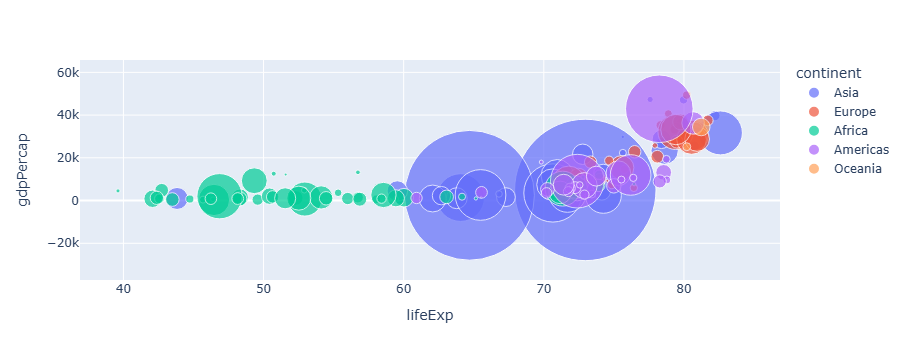

In [69]:
px.scatter(temp_df,x = 'lifeExp',y = 'gdpPercap',color = 'continent',size = 'pop',size_max = 100,hover_name = 'country')

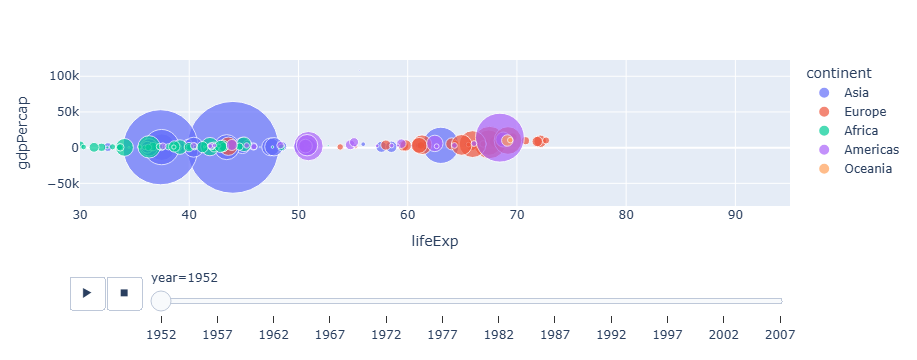

In [70]:
# plot animation of the above curve on the basis of year -->>> for each year pass gap instead 
# of temp_df (coz it's contains 2007 only)
px.scatter(gap,x = 'lifeExp',y = 'gdpPercap',
           color = 'continent',
           size = 'pop',
           size_max = 100,
           hover_name = 'country',
           range_x = [30,95],
           animation_frame = 'year',animation_group = 'country')

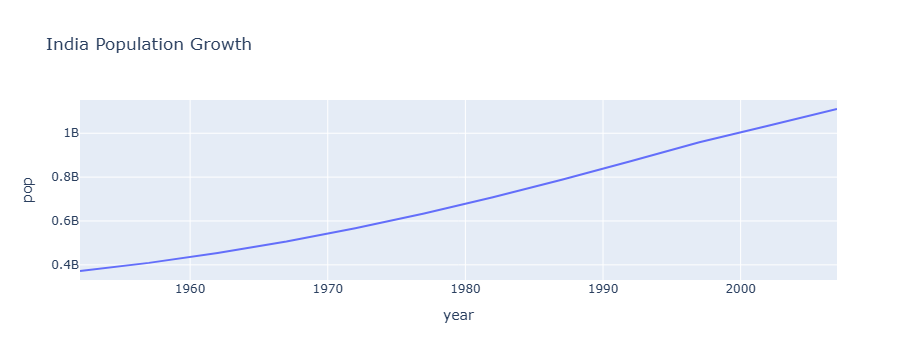

In [71]:
# line plot
# plot india population line plot
temp_df = gap[gap['country'] == 'India']
px.line(temp_df,x = 'year',y = 'pop',title = "India Population Growth")

In [72]:
# plot line plot of three countries India,China,pakistan on the same graph on the basis of life exp
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])]
# Now we have to make three diff colmns of life-exp coz there are three diff countries so we have to bring this long format 
# data into wide format hence use pivot function
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot(index = 'year',columns = 'country',values = 'lifeExp')
temp_df

country,China,India,Pakistan
year,,,
1952,44.00000,37.373,43.436
1957,50.54896,40.249,45.557
1962,44.50136,43.605,47.670
1967,58.38112,47.193,49.800
1972,63.11888,50.651,51.929
1977,63.96736,54.208,54.043
1982,65.52500,56.596,56.158
1987,67.27400,58.553,58.245
1992,68.69000,60.223,60.838


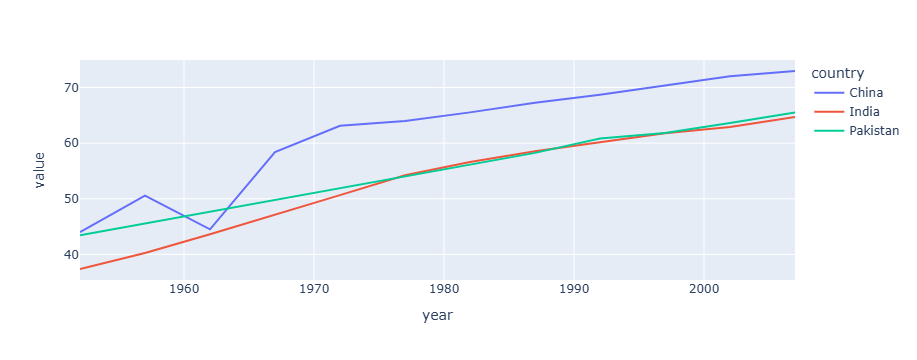

In [73]:
px.line(temp_df,x = temp_df.index, y = temp_df.columns)

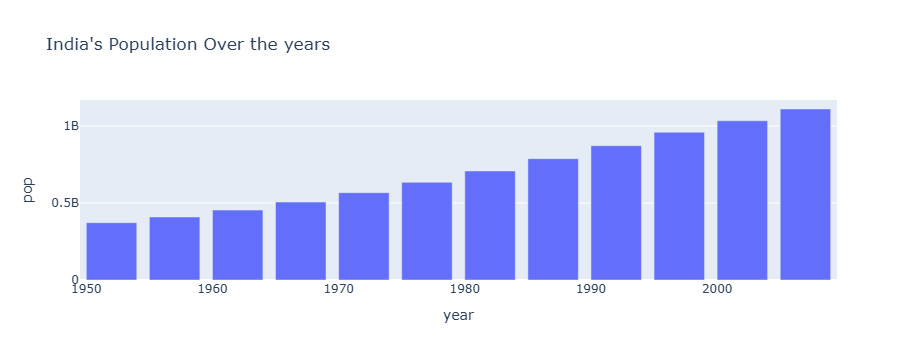

In [74]:
# bar chart 
# india's population over the years
temp_df = gap[gap['country'] == 'India']
px.bar(temp_df,x = 'year',y = 'pop',title = "India's Population Over the years")

In [75]:
# population comparison of 3 countries(let say India China Pakistan)
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])]
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot(index = 'year',
                                                                       columns = 'country',values = 'gdpPercap')
temp_df

country,China,India,Pakistan
year,,,
1952,400.448611,546.565749,684.597144
1957,575.987001,590.061996,747.083529
1962,487.674018,658.347151,803.342742
1967,612.705693,700.770611,942.408259
1972,676.900092,724.032527,1049.938981
1977,741.237470,813.337323,1175.921193
1982,962.421381,855.723538,1443.429832
1987,1378.904018,976.512676,1704.686583
1992,1655.784158,1164.406809,1971.829464


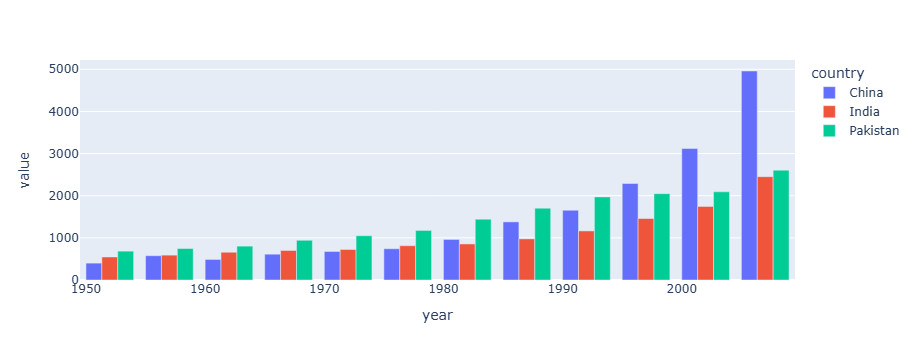

In [76]:
# Remember to pass barmode='group' otherwise by default it gives a stac
px.bar(temp_df,x = temp_df.index, y = temp_df.columns,barmode = 'group')

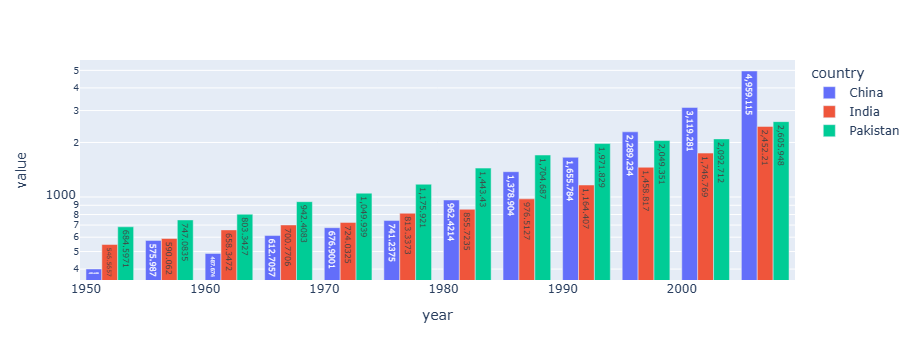

In [77]:
# grouped bar chart -->> text_auto -->> It print the value on the bar chart
# let say you have to convert yscale into log form then pass log_y = True let's take a example
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])]
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot(index = 'year',
                                                                       columns = 'country',values = 'gdpPercap')
px.bar(temp_df,x = temp_df.index, y = temp_df.columns,barmode = 'group',log_y = True,text_auto = True)

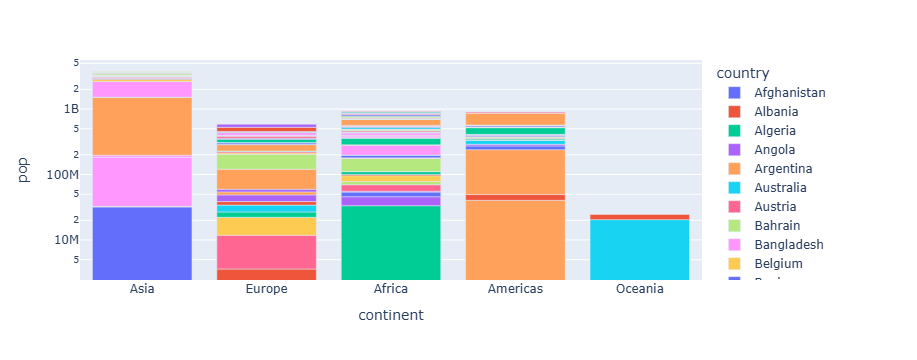

In [81]:
# stacked bar chart
# population contribution per country to a continents pop stacked for a particular year(2007)
temp_df = gap[gap['year'] == 2007]
temp_df
px.bar(temp_df,x = 'continent',y = 'pop',color = 'country',log_y = True)

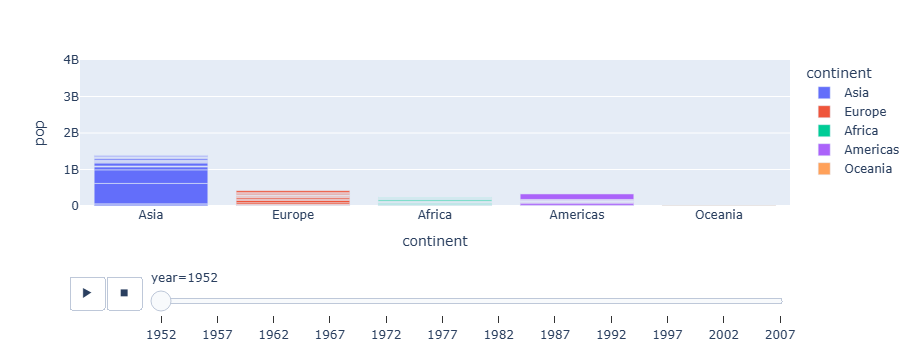

In [84]:
# bar chart animation
px.bar(gap, x = 'continent', y = 'pop', color = 'continent',
       animation_frame = 'year' , animation_group = 'country',
      range_y = [0,4000000000])

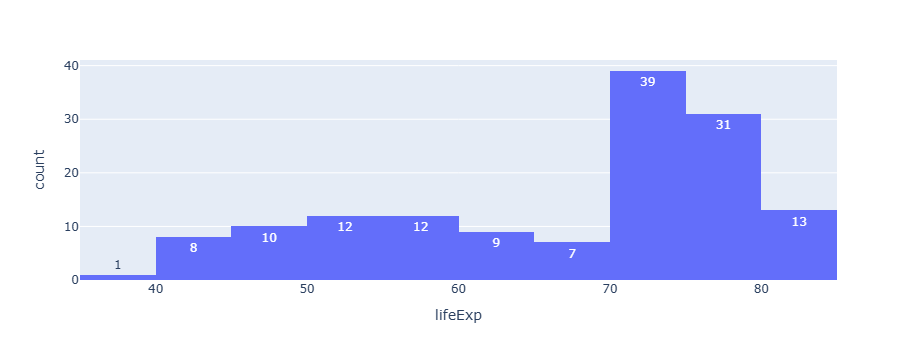

In [88]:
# histogram
# plot histogram of life expetencies of all countries in 2007 -->> nbins -->> text_auto
temp_df = gap[gap['year'] == 2007]
px.histogram(temp_df,x = 'lifeExp',nbins = 20,text_auto = True)

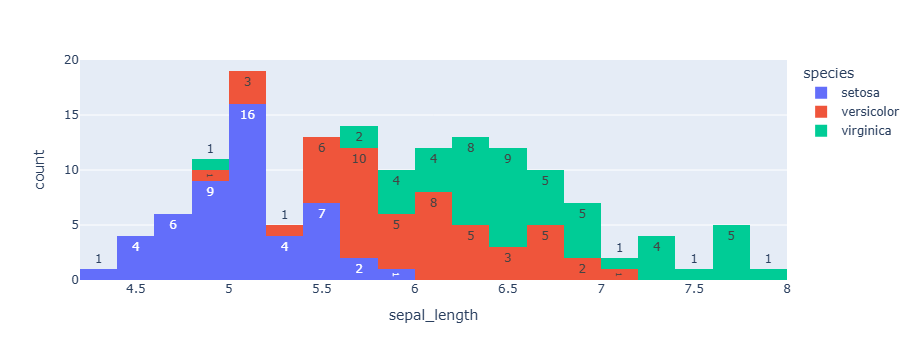

In [91]:
# plot histogram of sepal length of all iris species
px.histogram(iris,x = 'sepal_length',color = 'species',nbins = 30,text_auto = True)

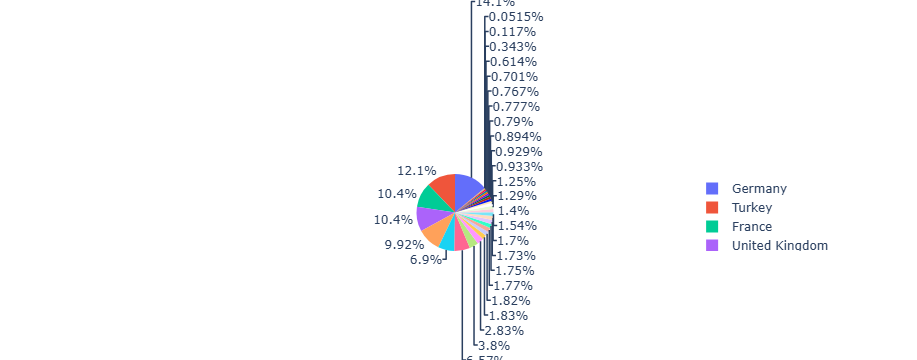

In [107]:
# pie -->> values -->> names
# find the pie chart of population of European Countries in 2007
temp_df = gap[(gap['year'] == 2007 ) & (gap['continent'] == 'Europe')]
px.pie(temp_df,values = 'pop',names = 'country')

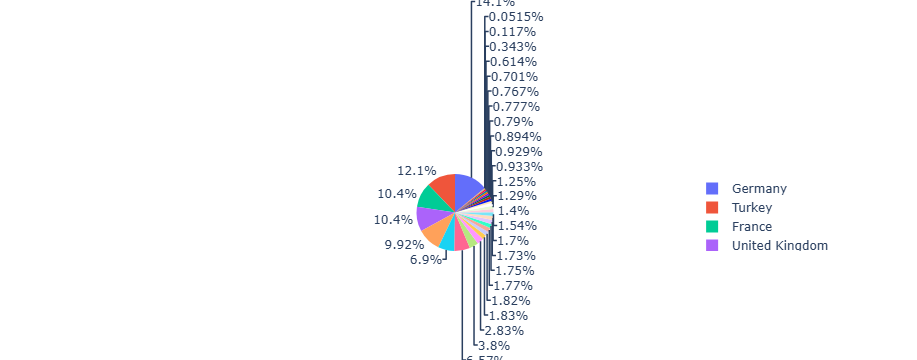

In [108]:

temp_df = gap[(gap['year'] == 2007) & (gap['continent'] == 'Europe')]

px.pie(temp_df, values='pop', names='country')

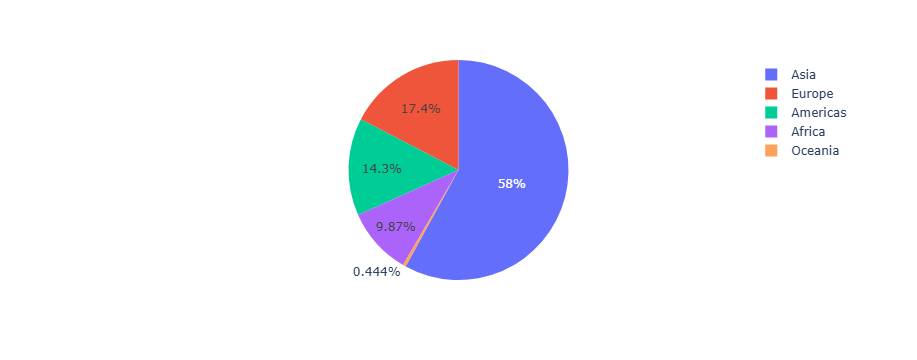

In [113]:
# plot pie chart of World Population in 1952 continent wise -->> explode(pull)
temp_df = gap[gap['year'] == 1952].groupby('continent')['pop'].sum().reset_index()
px.pie(temp_df, values = 'pop',names = 'continent')
# NOTE : There is no any option to explode(pull) for this you have to use Plotly Go

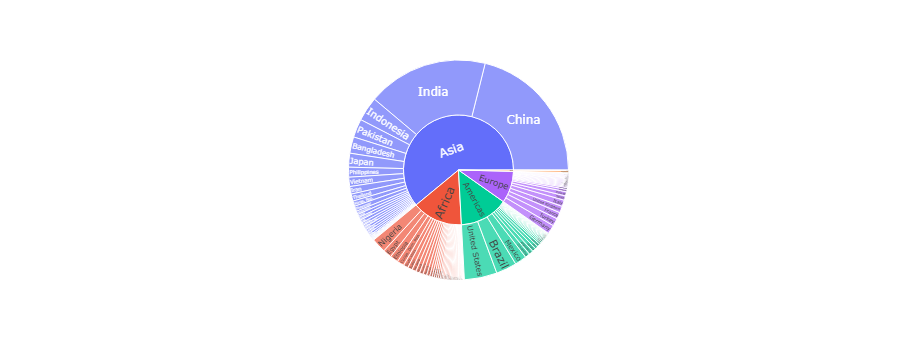

In [115]:
# Sunburst plot -->> Sunburst plots visualize hierarchial data spanning outwards radially from root to leaves -->> color
# path -->> [], values
temp_df = gap[gap['year'] == 2007]

px.sunburst(temp_df, path=['continent','country'],values='pop')
# Path me pass hierrarchials data
# values -->> pass that about which parameter you want to analyse

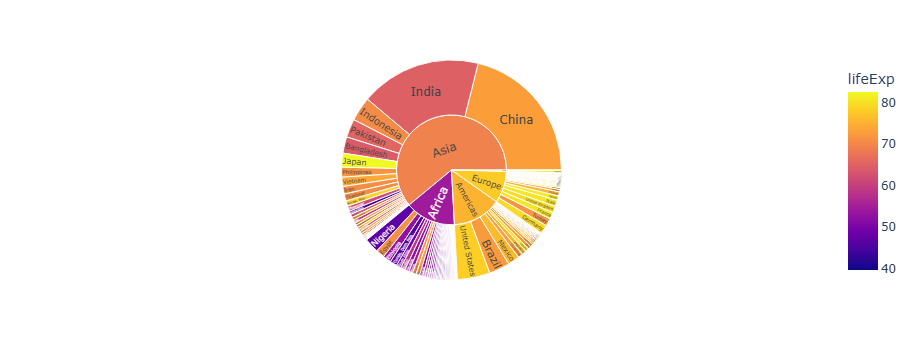

In [116]:
temp_df = gap[gap['year'] == 2007]
px.sunburst(temp_df, path=['continent','country'],values='pop',color='lifeExp')

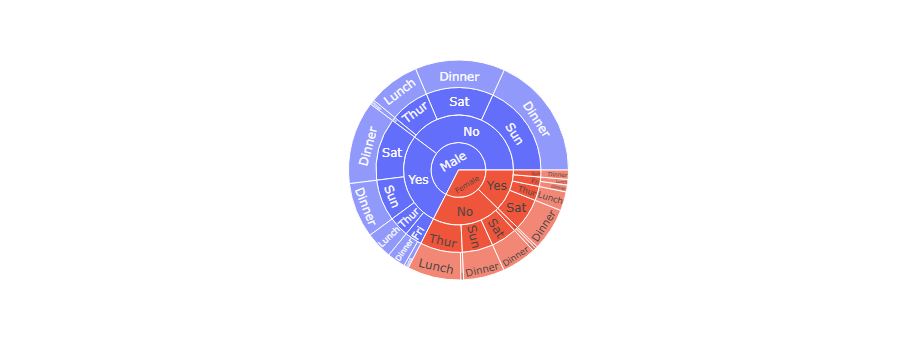

In [117]:
px.sunburst(tips,path = ['sex','smoker','day','time'],values = 'total_bill')

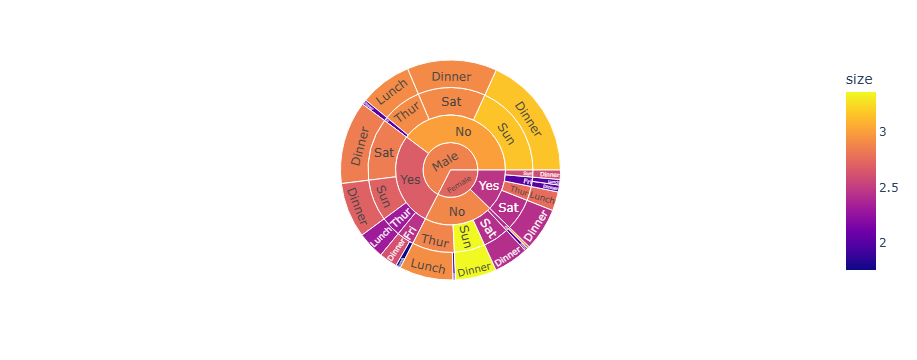

In [118]:
px.sunburst(tips,path = ['sex','smoker','day','time'],values = 'total_bill',color = 'size')

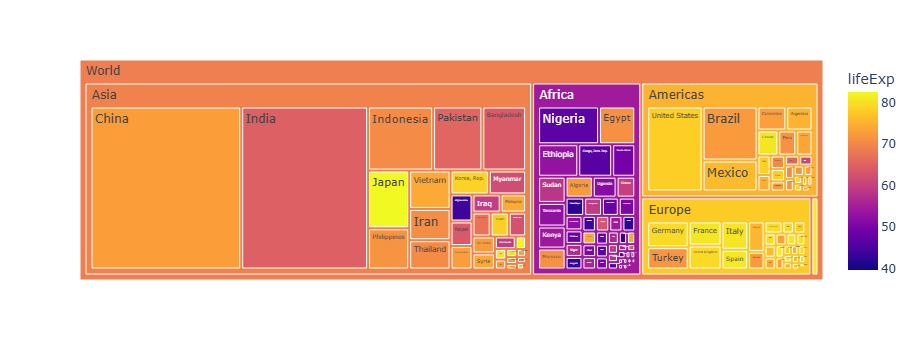

In [120]:
# Treemap
temp_df = gap[gap['year'] == 2007]
px.treemap(temp_df , path=[px.Constant('World'),'continent','country'],values = 'pop', color = 'lifeExp')

In [127]:
# Heatmap
tips.head()
# Now let'smake a pivot table in which index is day column is sex and value is total_bill and aggfunc = sum

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [128]:
temp_df = tips.pivot_table(index = 'day',columns = 'sex',values = 'total_bill',aggfunc = 'sum')
temp_df

sex,Female,Male
day,,
Fri,127.31,198.57
Sat,551.05,1227.35
Sun,357.70,1269.46
Thur,534.89,561.44


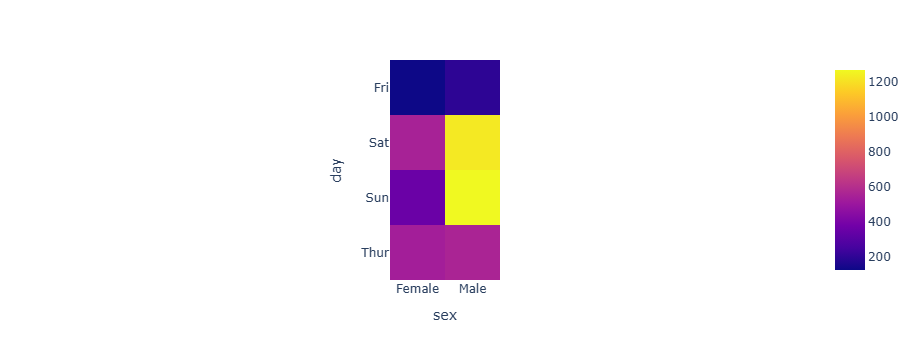

In [129]:
px.imshow(temp_df)

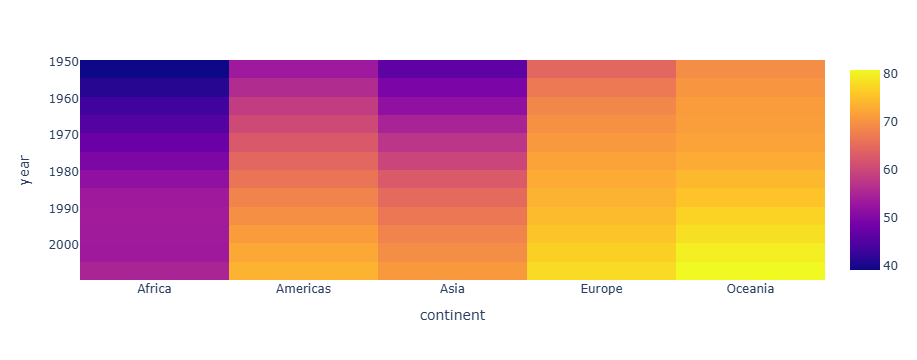

In [133]:
# Heatmap -->> find heatmap of all continents with year on average life expetencies
temp_df = gap.pivot_table(index = 'year',columns = 'continent', values = 'lifeExp',aggfunc = 'mean')
px.imshow(temp_df)

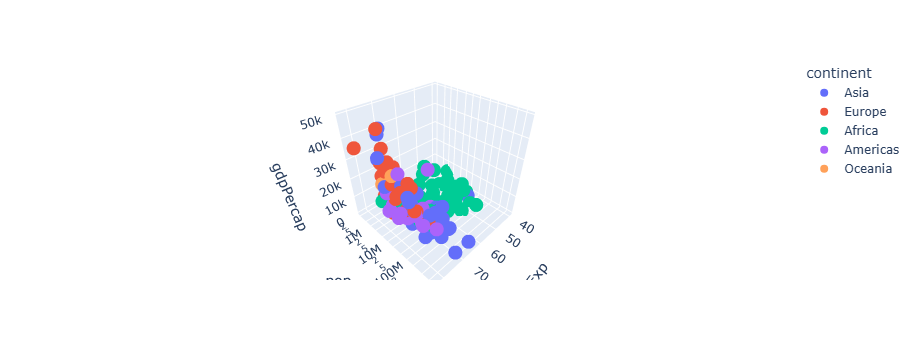

In [136]:
# 3D Scatter Plot
# Plot a 3D plot of all country data for 2007
temp_df = gap[gap['year'] == 2007]
px.scatter_3d(temp_df,x='lifeExp',y='pop',z='gdpPercap',log_y = True,color = 'continent')

In [137]:
# Another Example of 3D scatter plot
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


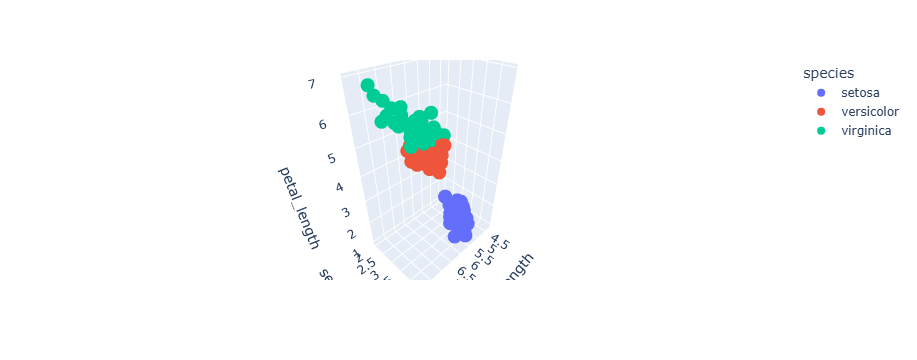

In [138]:
px.scatter_3d(iris,x='sepal_length',y='sepal_width',z='petal_length',color = 'species')

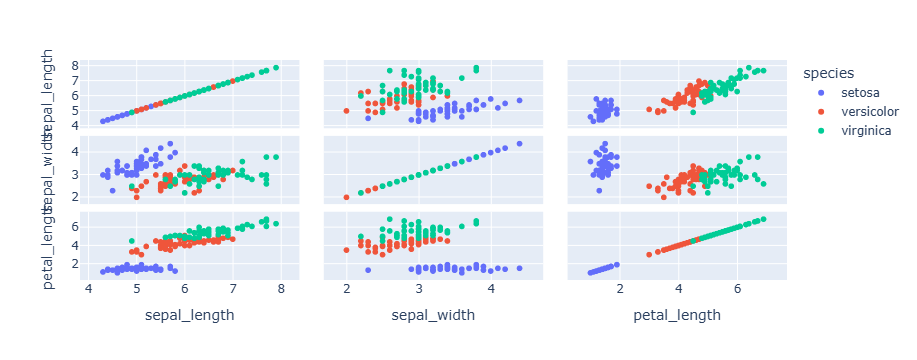

In [140]:
# Scatter_matrix -->> dimensions
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length'],color = 'species')
# NOTE: You can pass any no of times of sepal_length/width etc in the dimensions -->> see below

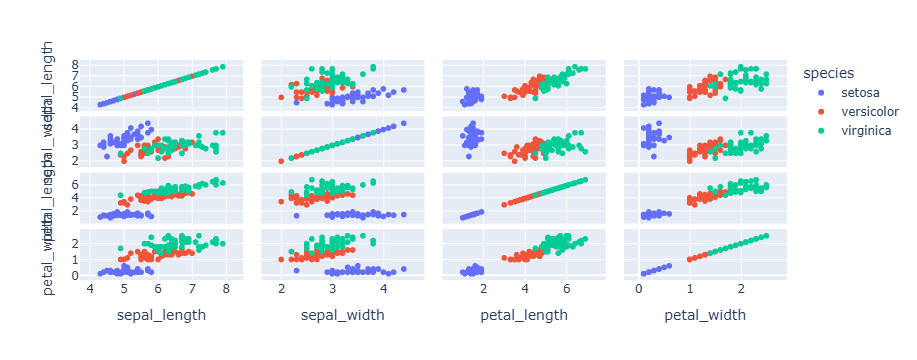

In [141]:
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length','petal_width'],color = 'species')
